## Winning in the Data Science Field

For this project I have chosen to use the 2019 Kaggle ML & DS Survey.

In [427]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
%matplotlib inline
#sns.set(style="white")

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)

# Import data
df = pd.read_csv('./multiple_choice_responses.csv')

## Data Cleaning Steps

In [ ]:
# Filter data among professionals only
df = df[~df.Q5.isin(['Student', 'Not employed']) & df.Q5.notnull()]

# Recode some of the salary bins
df.loc[df['Q10'].isin(['200,000-249,999', '250,000-299,999','300,000-500,000','> $500,000']), 'Q10'] = '>= $200,000'

## Function Creation

In [ ]:
##### Function to create barplots for questions that are categorical and single answer
def barplots_single_answer(q_number, x_title, y_title, chart_title, order=None):
    cat_values = round((df[pd.notnull(df[q_number])][q_number].value_counts()/len(df[pd.notnull(df[q_number])][q_number])) * 100,1)
    cat_values = cat_values.reset_index().rename(columns = {'index':q_number, q_number:'pct'}) 
    f, ax = plt.subplots(figsize=(8,8))
    sns.barplot(x = 'pct', y = q_number, data=cat_values, color='dodgerblue', order=order)
    ax.set_xlabel(x_title)
    ax.set_ylabel(y_title)
    plt.title(chart_title, size=16)

def barplots_heatmap_single_answer(q_number, chart_title, order_rows = False):
    '''
    INPUT:
    q_number - question number for the variable of interest. It should be a single-answer question.
    chart_title - what you want for the main title
    order_rows - desired sorting of the rows (will default to descending according to frequency of answers)

    OUTPUT:
    Two charts: A barplot that shows the frequency in % for the variable of interest, and a heatmap
    that visually correlates the variable of interest with salary range.
    
    This function prepares the data for the visualization and provides the two visualizations specified.
    '''        
    # Value count for the variable of interest
    cat_values = round((df[pd.notnull(df[q_number])][q_number].value_counts()/len(df[pd.notnull(df[q_number])][q_number])) * 100,1)
    if(order_rows == False):
        cat_values = cat_values
    else:
        cat_values = cat_values.reindex(index = order_rows) 
    cat_values = cat_values.reset_index().rename(columns = {'index':q_number, q_number:'pct'}) 

    # Sort order for the salary bins
    order_col = ['$0-999','1,000-1,999','2,000-2,999','3,000-3,999','4,000-4,999','5,000-7,499','7,500-9,999','10,000-14,999',
                 '15,000-19,999','20,000-24,999','25,000-29,999','30,000-39,999','40,000-49,999','50,000-59,999',
                 '60,000-69,999','70,000-79,999','80,000-89,999','90,000-99,999','100,000-124,999','125,000-149,999',
                 '150,000-199,999','>= $200,000']
    y_labels = cat_values[q_number]
        
    # Crosstabs for the salary and variable of interest
    crosstab_dataprac = pd.crosstab(df[q_number],df['Q10'], normalize='index')
    crosstab_dataprac = crosstab_dataprac.reindex(order_col, axis="columns")    
    if(order_rows == False):
        crosstab_dataprac = crosstab_dataprac.reindex(y_labels, axis="rows")
    else:
        crosstab_dataprac = crosstab_dataprac.reindex(order_rows, axis="rows")        

    # Set-up subplots
    fig = plt.figure(figsize=(14,6))
    grid = plt.GridSpec(1, 10, wspace=10, hspace=1)
    plt.subplot(grid[0, :3])
    
    # Left plot (barplot)
    ax1 = sns.barplot(x = 'pct', y = q_number, data=cat_values, color='dodgerblue', order=None)
    plt.title(chart_title, fontsize = 14, fontweight ='bold')
    ax1.set_xlabel('Percentage %')
    ax1.set_ylabel('')    
    # Text-wrapping of y-labels
    f = lambda x: textwrap.fill(x.get_text(), 27)
    ax1.set_yticklabels(map(f, ax1.get_yticklabels()))
    
    # Right plot (heatmap)
    plt.subplot(grid[0, 4:])
    ax2 = sns.heatmap(crosstab_dataprac, cmap="Blues", cbar=False)
    plt.title("Annual Salary by Data Science Role", fontsize = 14, fontweight ='bold')
    ax2.set_xlabel('Yearly Salary')
    ax2.set_ylabel('')
    ax2.set_yticklabels(map(f, ax2.get_yticklabels()))

## A. Who are the data practitioners and how do they practice data science?

### 1. Data Practitioners Distribution (Q5) - Bar Chart

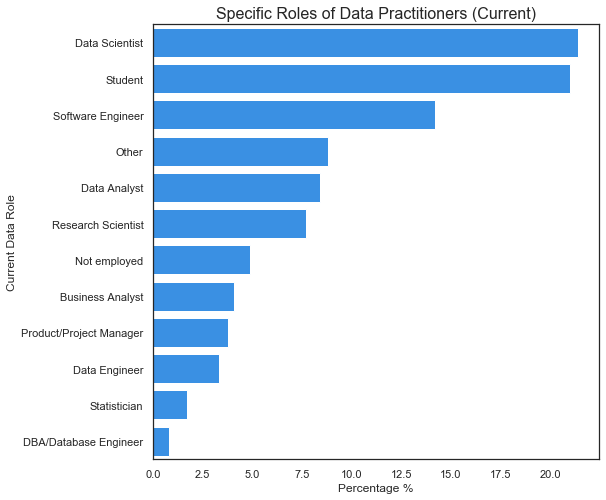

In [429]:
barplots_single_answer('Q5', 'Percentage %', 'Current Data Role', 'Specific Roles of Data Practitioners (Current)')

### 2. Salary Distribution (Q10) - Bar Chart

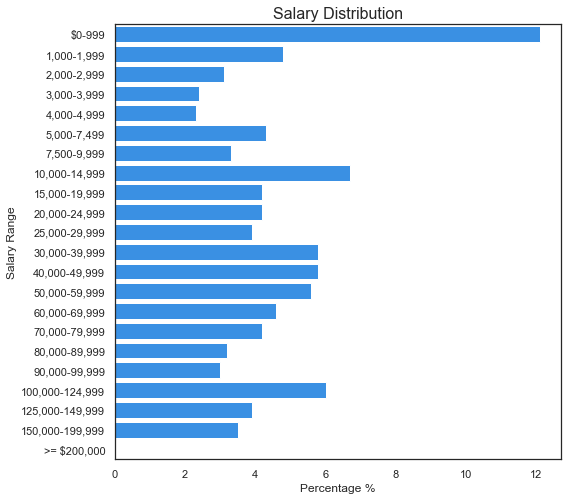

In [428]:
barplots_single_answer('Q10', 'Percentage %', 'Salary Range', 'Salary Distribution',
                ['$0-999','1,000-1,999','2,000-2,999','3,000-3,999','4,000-4,999','5,000-7,499','7,500-9,999','10,000-14,999',
                 '15,000-19,999','20,000-24,999','25,000-29,999','30,000-39,999','40,000-49,999','50,000-59,999',
                 '60,000-69,999','70,000-79,999','80,000-89,999','90,000-99,999','100,000-124,999','125,000-149,999',
                 '150,000-199,999','>= $200,000'])

### 3. Salary Distribution by Data Practitioner Type - Heatmap 

Text(0.5, 1, 'Annual Salary by Data Science Role')

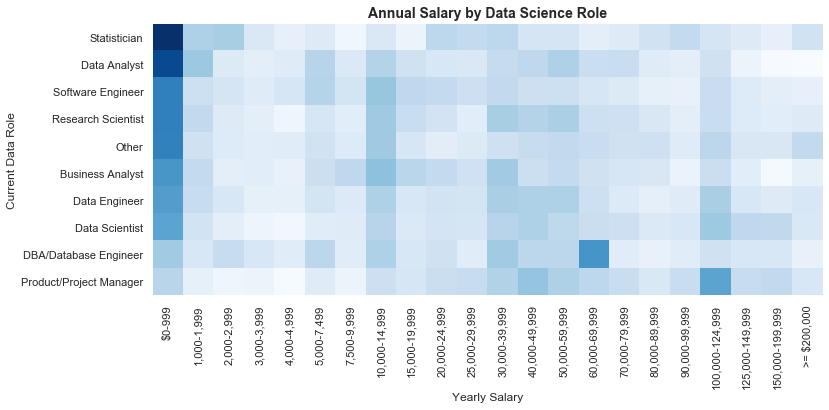

In [333]:
order_col = ['$0-999','1,000-1,999','2,000-2,999','3,000-3,999','4,000-4,999','5,000-7,499','7,500-9,999','10,000-14,999',
                 '15,000-19,999','20,000-24,999','25,000-29,999','30,000-39,999','40,000-49,999','50,000-59,999',
                 '60,000-69,999','70,000-79,999','80,000-89,999','90,000-99,999','100,000-124,999','125,000-149,999',
                 '150,000-199,999','>= $200,000']

crosstab_dataprac = pd.crosstab(df['Q5'],df['Q10'], normalize='index')
crosstab_dataprac = crosstab_dataprac.reindex(order_col, axis="columns")
crosstab_dataprac = crosstab_dataprac.sort_values(crosstab_dataprac.columns[0], ascending=False)

f, ax = plt.subplots(figsize=(12,5))

ax = sns.heatmap(crosstab_dataprac, cmap="Blues", cbar=False)
ax.set_xlabel('Yearly Salary')
ax.set_ylabel('Current Data Role')
plt.title("Annual Salary by Data Science Role", fontsize = 14, fontweight ='bold')

### 4.a Primary Data Analysis Tools 

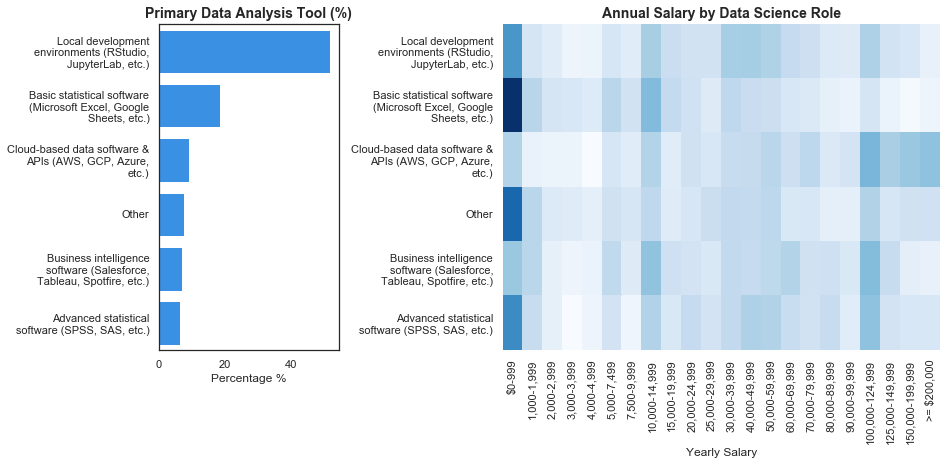

In [425]:
barplots_heatmap_single_answer('Q14', 'Primary Data Analysis Tool (%)')

### 4.b Programming Languages Used 

In [166]:
pd.concat([df['Q18_Part_1'].value_counts(),df['Q18_Part_2'].value_counts()])

Python    9363
R         3652
dtype: int64

## B. How did they learn the practice?

### 6. Highest level of educational attainment (Q4) - Bar chart and salary heatmap side by side

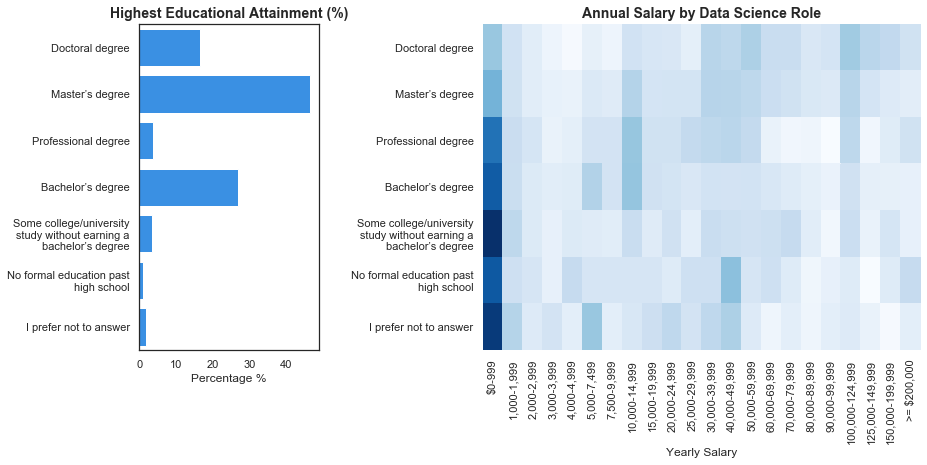

In [418]:
barplots_heatmap_single_answer('Q4', 'Highest Educational Attainment (%)', 
                               order_rows=['Doctoral degree', 'Master’s degree', 'Professional degree', 'Bachelor’s degree',
                                           'Some college/university study without earning a bachelor’s degree',
                                           'No formal education past high school','I prefer not to answer'])

### 7. Platforms where learn data science (Q13) - Bar chart and salary heatmap side by side

### 8. How long have been doing code to analyze data (Q15) - Bar chart and salary heatmap side by side

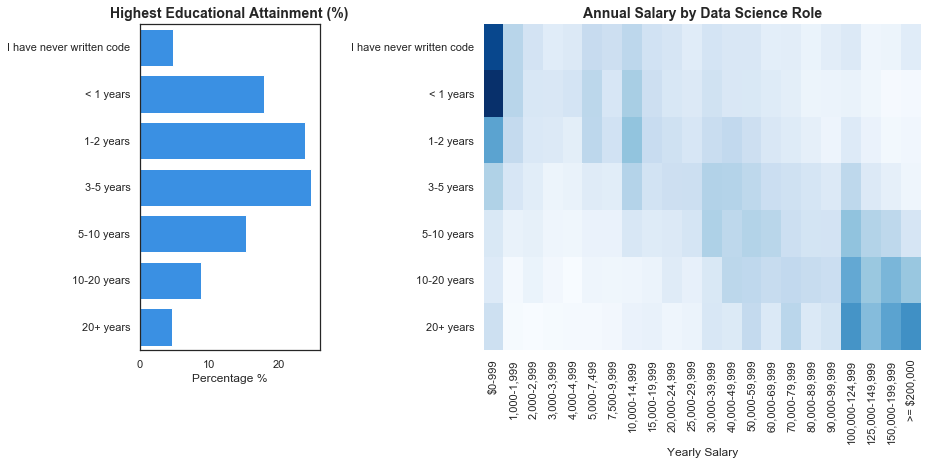

In [424]:
barplots_heatmap_single_answer('Q15', 'Highest Educational Attainment (%)',
                              order_rows = ['I have never written code','< 1 years', '1-2 years', '3-5 years', '5-10 years',
                                          '10-20 years', '20+ years'])

### 9. Favorite Media Sources (Q12) - Bar chart and salary heatmap side by side

### 10. Try to model salary